In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, classification_report, precision_score, recall_score, confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import warnings
import shap
import imblearn
import eli5
import lime

warnings.filterwarnings("ignore")
shap.initjs()

In [46]:
df = pd.read_csv('adult.csv') # Loading the dataset

In [47]:
df.shape

(32561, 15)

In [48]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
df.replace('?', np.nan, inplace = True) # Here we replace '?' with nan
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [51]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [52]:
len(df.loc[ (df['occupation'].isnull()) & ((df['workclass'].isnull()))])

1836

In [53]:
df.dropna(inplace = True)
# Now we tackled with missing data
# check for duplicates
df.drop_duplicates(inplace=True)

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30139.0,38.441720,13.131426,17.0,28.0,37.0,47.0,90.0
fnlwgt,30139.0,189795.025980,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
education.num,30139.0,10.122532,2.548738,1.0,9.0,10.0,13.0,16.0
capital.gain,30139.0,1092.841202,7409.110596,0.0,0.0,0.0,0.0,99999.0
capital.loss,30139.0,88.439928,404.445239,0.0,0.0,0.0,0.0,4356.0
hours.per.week,30139.0,40.934703,11.978753,1.0,40.0,40.0,45.0,99.0


income
<=50K    22633
>50K      7506
Name: count, dtype: int64


<Axes: ylabel='count'>

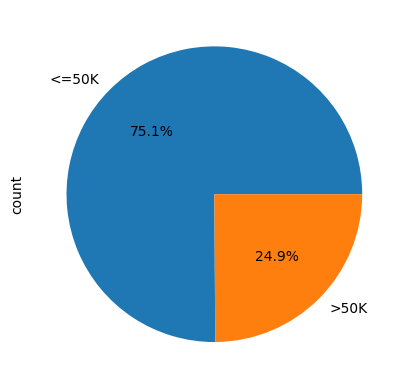

In [55]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct= '%1.1f%%')

Age Distribution

Text(0, 0.5, 'count')

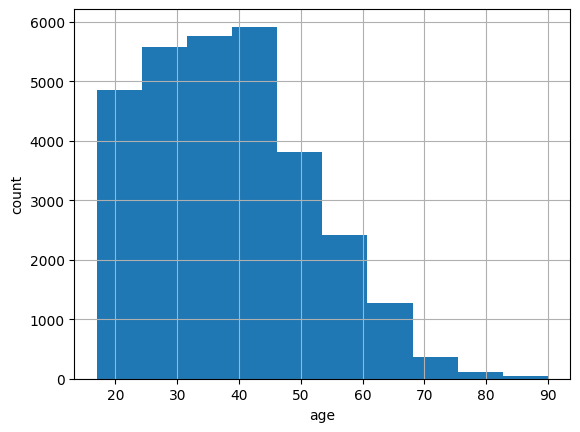

In [56]:
df['age'].hist()
plt.xlabel('age')
plt.ylabel('count')

Final Weight Distribution

Text(0, 0.5, 'count')

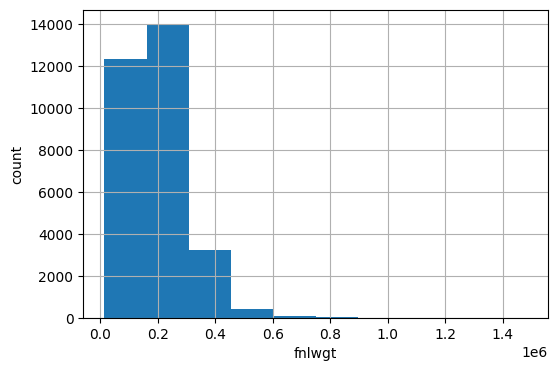

In [57]:
df['fnlwgt'].hist(figsize=(6,4))
plt.xlabel('fnlwgt')
plt.ylabel('count')

Capital-gain Distribution

Text(0, 0.5, 'count')

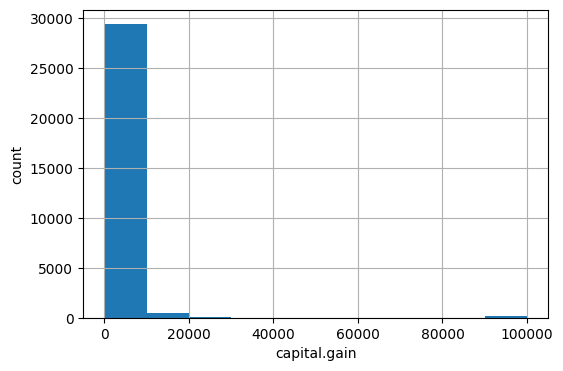

In [58]:
df['capital.gain'].hist(figsize=(6,4))
plt.xlabel('capital.gain')
plt.ylabel('count')

Capital-loss Distribution

Text(0, 0.5, 'count')

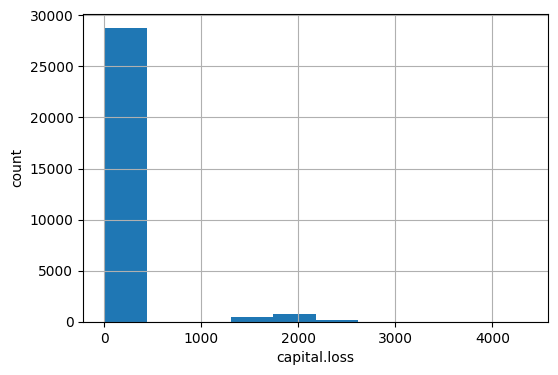

In [59]:
df['capital.loss'].hist(figsize=(6,4))
plt.xlabel('capital.loss')
plt.ylabel('count')

hours-per-week Distribution

Text(0, 0.5, 'count')

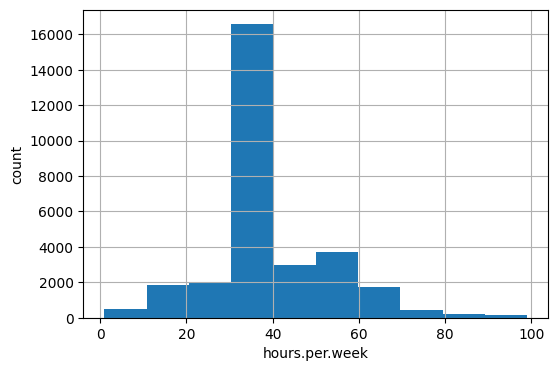

In [60]:
df['hours.per.week'].hist(figsize=(6,4))
plt.xlabel('hours.per.week')
plt.ylabel('count')

 Workclass Distribution

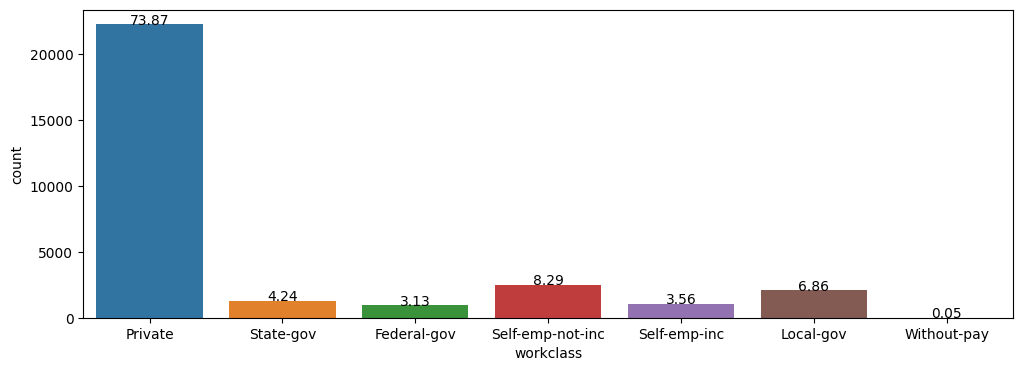

In [61]:
plt.figure(figsize=(12,4))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")

Education Distribution

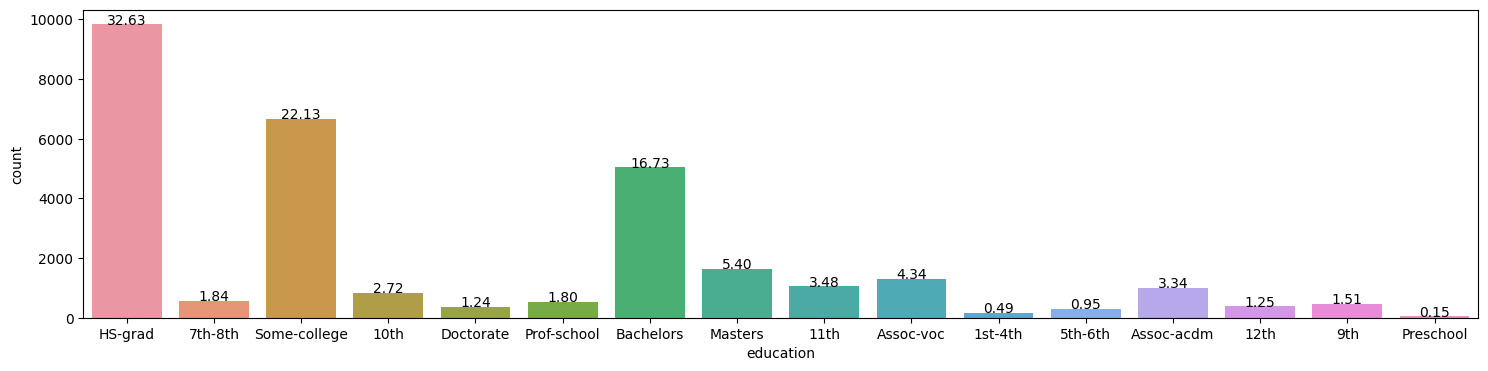

In [62]:
plt.figure(figsize=(18,4))

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

Marital-Status Distribution:

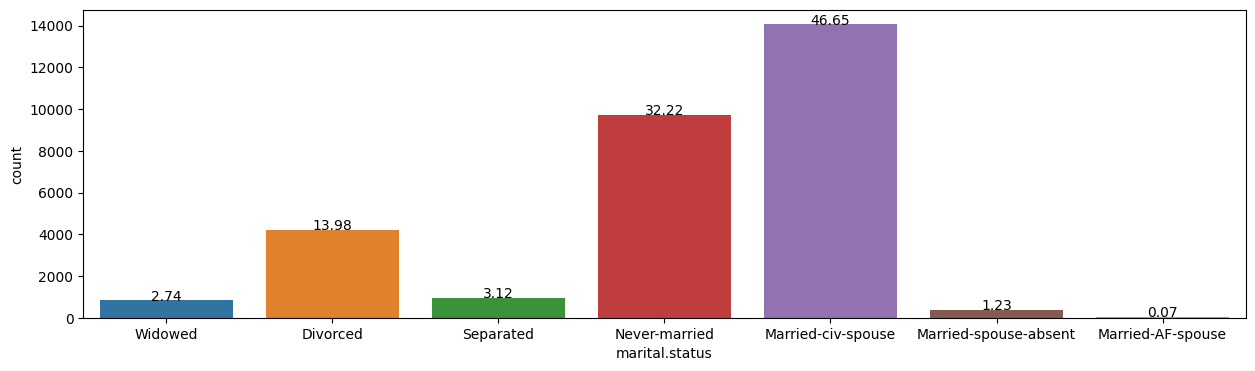

In [63]:
plt.figure(figsize=(15,4))
total = float(len(df) )
a = sns.countplot(x="marital.status", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

Occupation Distribution:

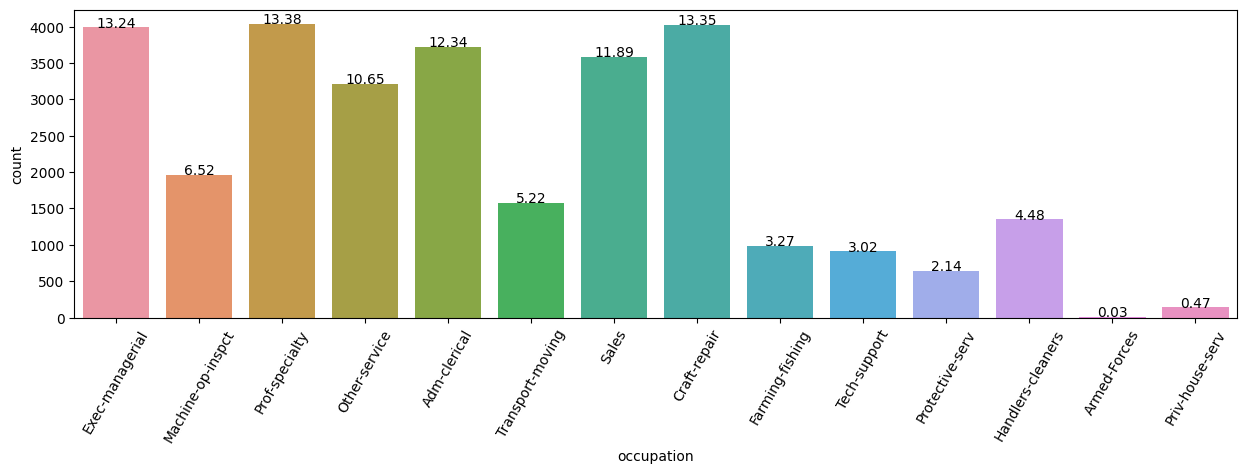

In [64]:
plt.figure(figsize=(15,4))
total = float(len(df) )
a = sns.countplot(x="occupation", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()

Relationship Distribution

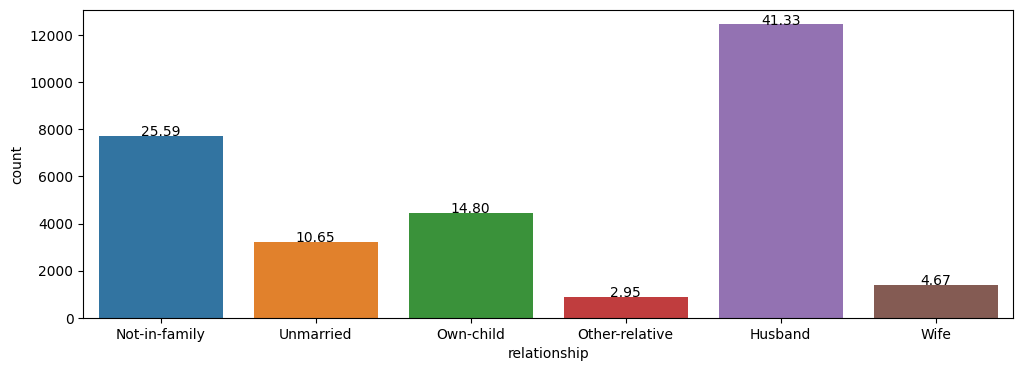

In [65]:
plt.figure(figsize=(12,4))
total = float(len(df) )
a = sns.countplot(x="relationship", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

Income (Target) Variable Distribution

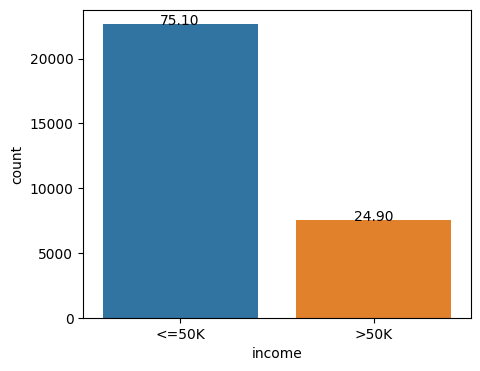

In [66]:
plt.figure(figsize=(5,4))
total = float(len(df) )
a = sns.countplot(x="income", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")
    

Feature Scaling

In [67]:
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


From observation we conclude that education. num and education are similar with education is categorical and education.num as numerical


I see that Education Number and Education are just the same, so, Education of them column could be droped.we need to drop capital-gain and capital-loss because most of the rows have value zero

In [68]:
df.drop(['education','capital.gain','capital.loss'], axis = 1, inplace = True)
df.shape

(30139, 12)

Data pre-processing

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,2,132870,9,6,3,1,4,0,18,38,0
3,54,2,140359,4,0,6,4,4,0,40,38,0
4,41,2,264663,10,5,9,3,4,0,40,38,0
5,34,2,216864,9,0,7,4,4,0,45,38,0
6,38,2,150601,6,5,0,4,4,1,40,38,0


In [70]:
X = df.drop('income', axis = 1)
y = df['income']
# standardizing the dataframe
X = StandardScaler().fit_transform(X)
X.shape

(30139, 11)

In [71]:
from imblearn import combine

smt = combine.SMOTETomek(
    random_state=14
)  # To make the dependant variable balanced using SMOTETomek method
X, y = smt.fit_resample(X, y)  # resampling the dataset

Data Splitting

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)

In [73]:

model = RandomForestClassifier(criterion="gini",n_estimators=100,max_depth=13, random_state=42)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Accuracy=',accuracy_score(y_test, y_predict))




Accuracy= 0.8699704478290521


In [74]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4412
           1       0.84      0.91      0.87      4386

    accuracy                           0.87      8798
   macro avg       0.87      0.87      0.87      8798
weighted avg       0.87      0.87      0.87      8798



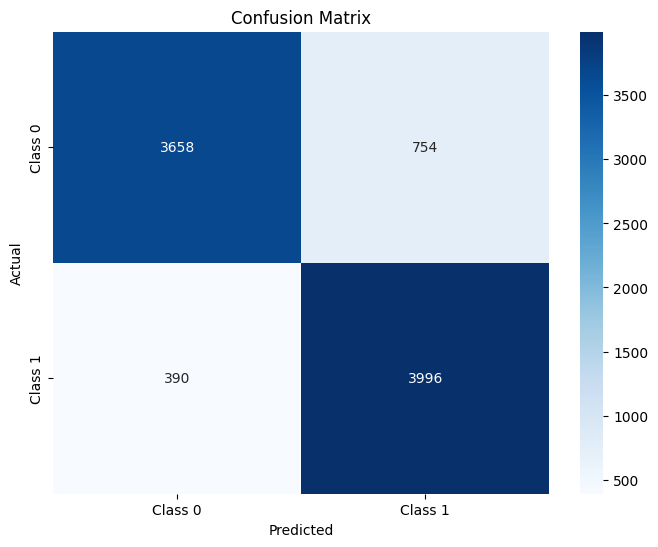

In [75]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [76]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1_score = f1_score(y_test, y_predict)

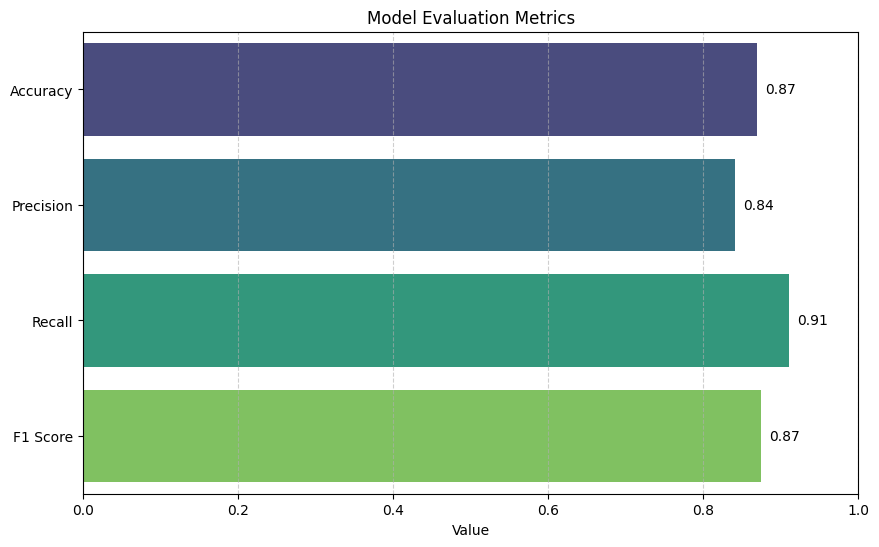

In [77]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Value')
plt.xlim(0, 1)  
plt.grid(axis='x', linestyle='--', alpha=0.6)


for i, v in enumerate(values):
    plt.text(v + 0.01, i, f'{v:.2f}', color='black', va='center')

plt.show()

In [78]:
explainer = shap.TreeExplainer(model,feature_names=df.columns)
shap_values = explainer.shap_values(pd.DataFrame(x_test))



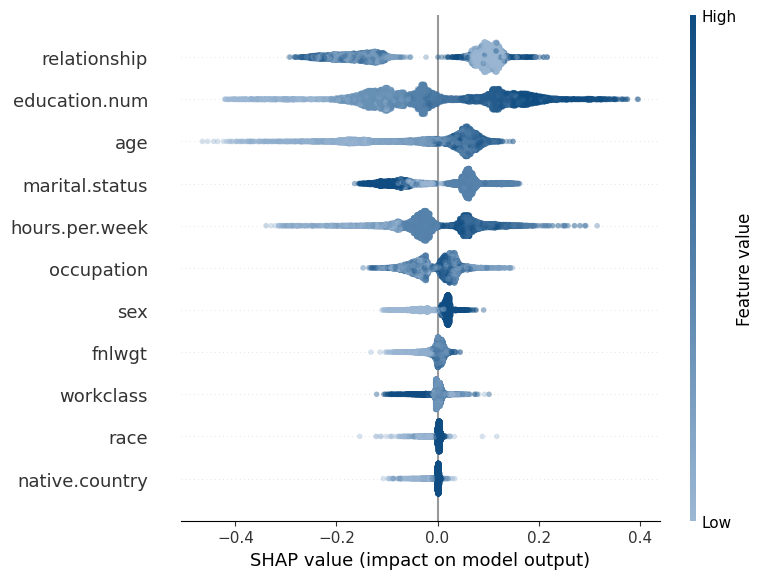

In [79]:
import matplotlib
colors = ["#9bb7d4", "#0f4c81"]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values[1],x_test,cmap=cmap,alpha=0.4,feature_names=df.columns)

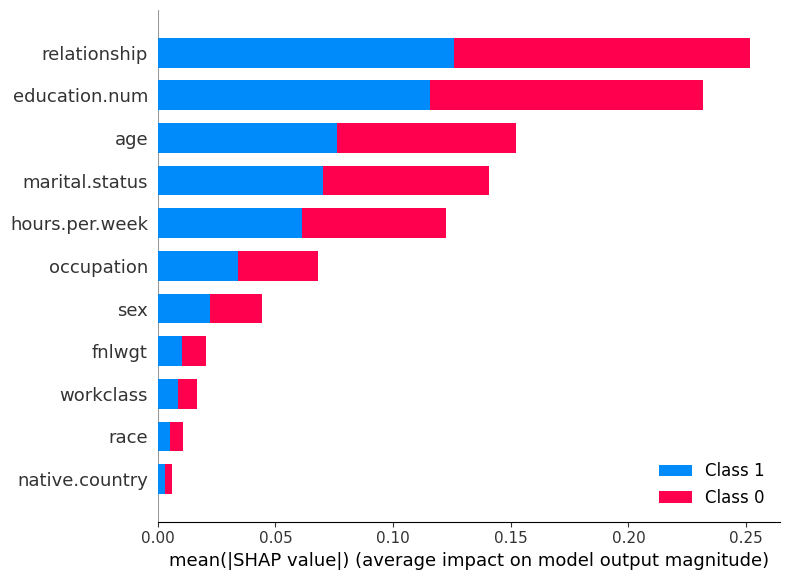

In [80]:
shap.summary_plot(shap_values, x_test, plot_type="bar",feature_names=df.columns)

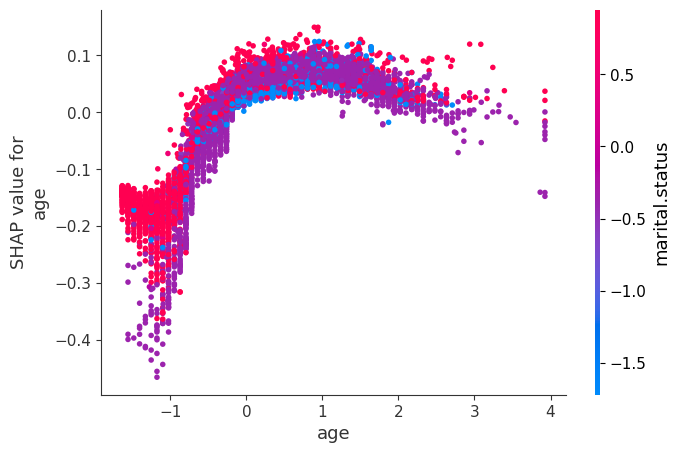

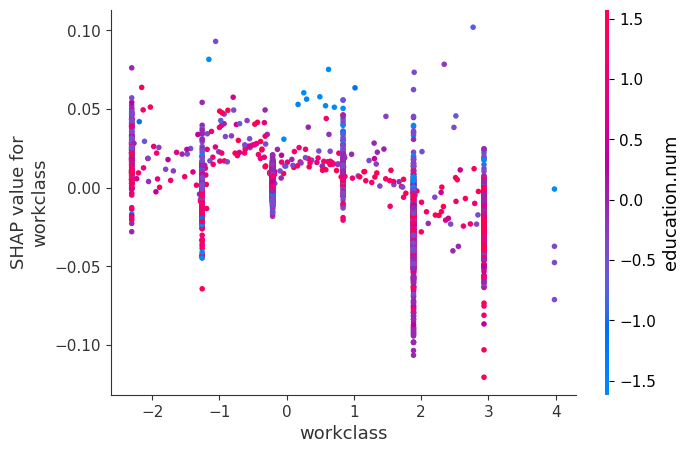

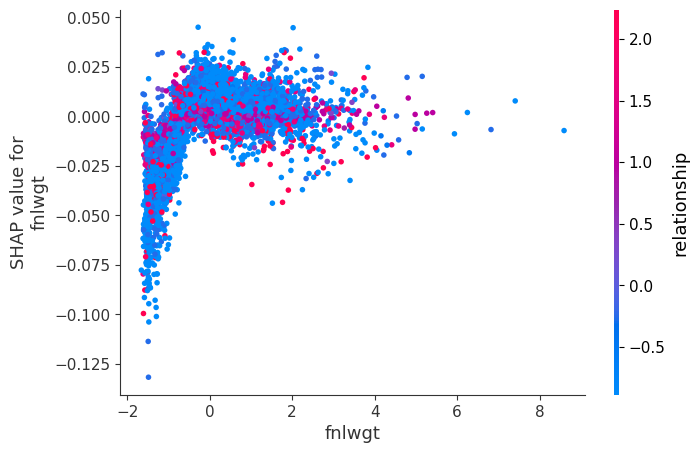

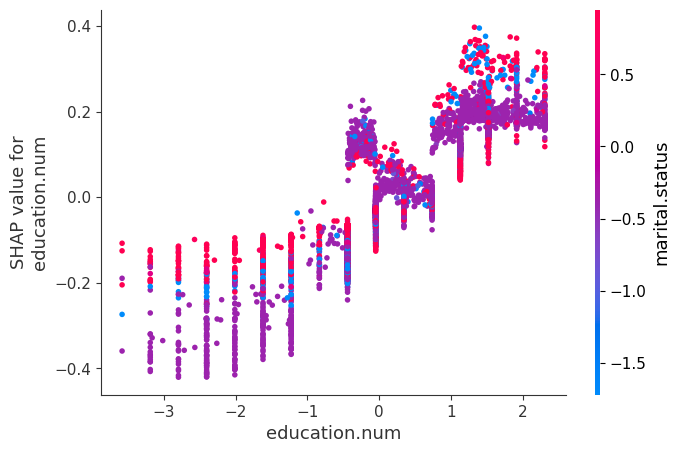

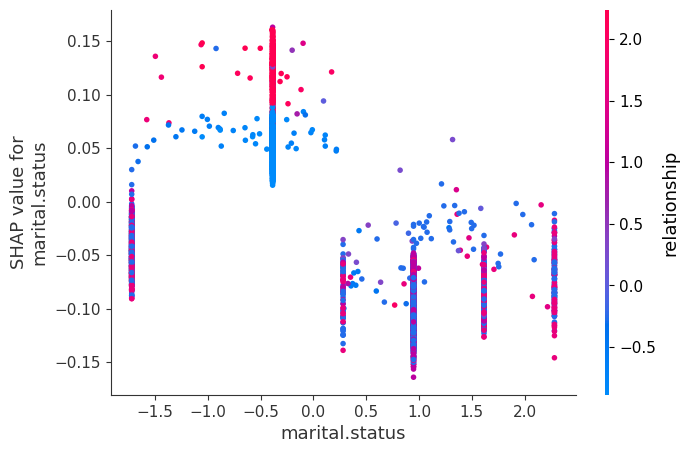

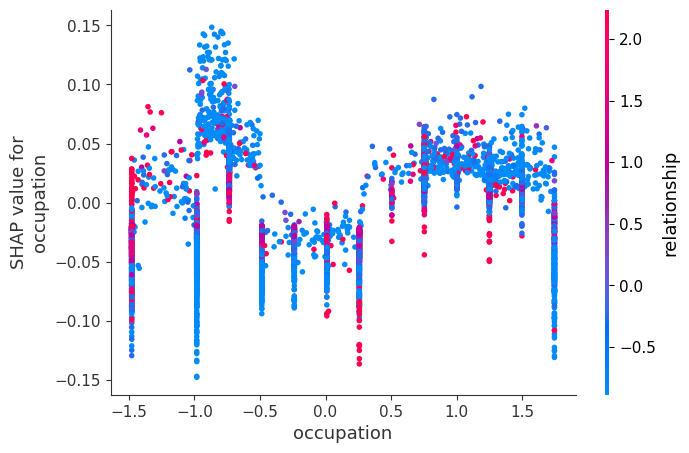

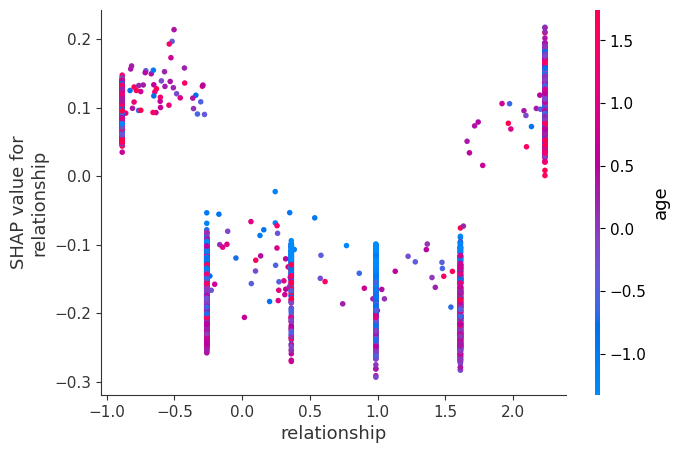

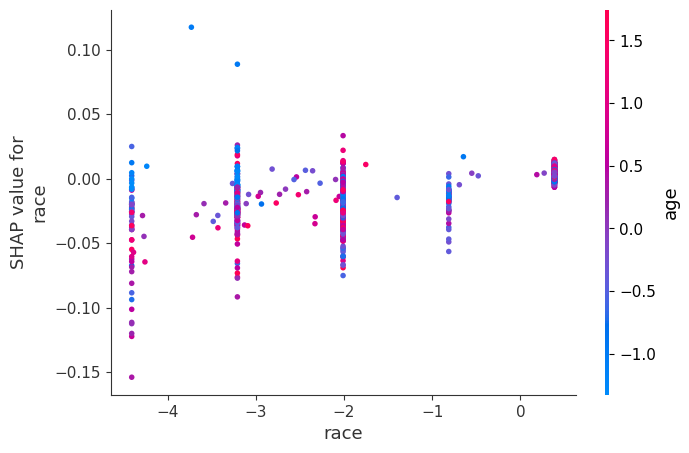

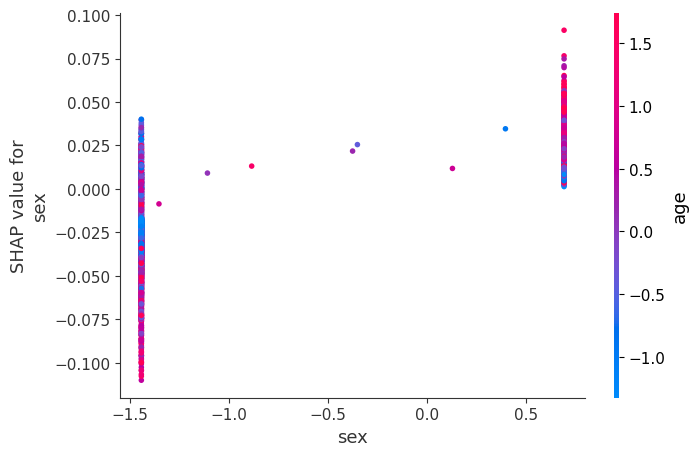

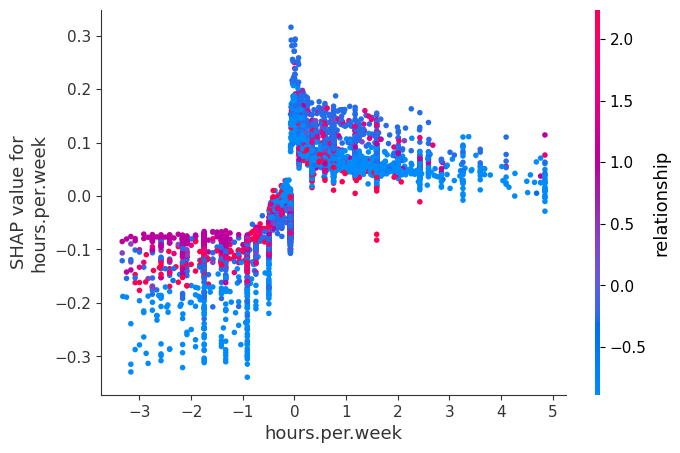

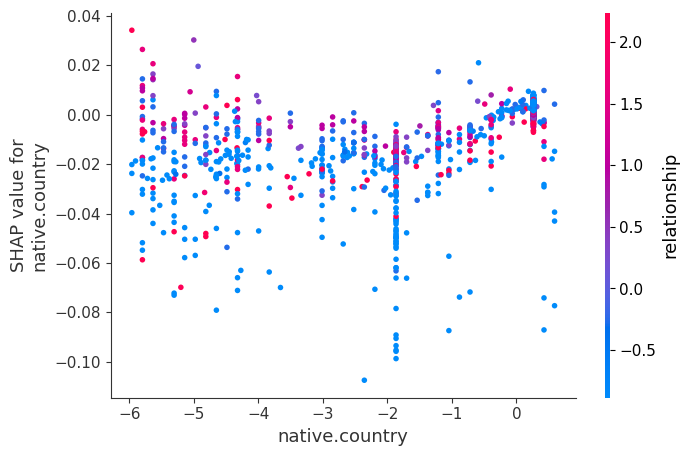

In [81]:
for name in pd.DataFrame(x_test).columns:
    shap.dependence_plot(name, shap_values[1],x_test,feature_names=df.columns)

In [82]:

cols=df.drop(columns=["income"])
eli5.show_weights(model, feature_names=cols.columns.to_list())

Weight,Feature
0.2236 ± 0.3007,relationship
0.2054 ± 0.1000,education.num
0.1504 ± 0.3045,marital.status
0.1493 ± 0.1576,age
0.0963 ± 0.0740,hours.per.week
0.0641 ± 0.0501,occupation
0.0448 ± 0.0101,fnlwgt
0.0254 ± 0.0647,sex
0.0212 ± 0.0055,workclass
0.0099 ± 0.0070,race


In [83]:
# Create a LIME explainer
import lime.lime_tabular 
explainer = lime.lime_tabular.LimeTabularExplainer(pd.DataFrame(X).values,feature_names=cols.columns.values.tolist(),class_names=['<=50','>50'],verbose=True,mode='classification')


In [84]:


# Explain the prediction using LIME
explanation = explainer.explain_instance(pd.DataFrame(X).values[1], model.predict_proba, num_features=len(pd.DataFrame(X).columns))



Intercept 0.6189056891097082
Prediction_local [0.3858465]
Right: 0.02367811107549628


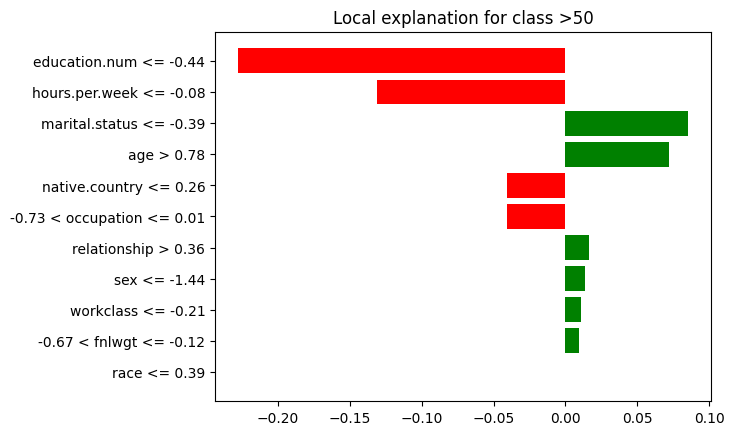

In [85]:
explanation.as_pyplot_figure()

plt.show()

In [86]:
joblib.dump(model, 'adult.joblib') 

['adult.joblib']

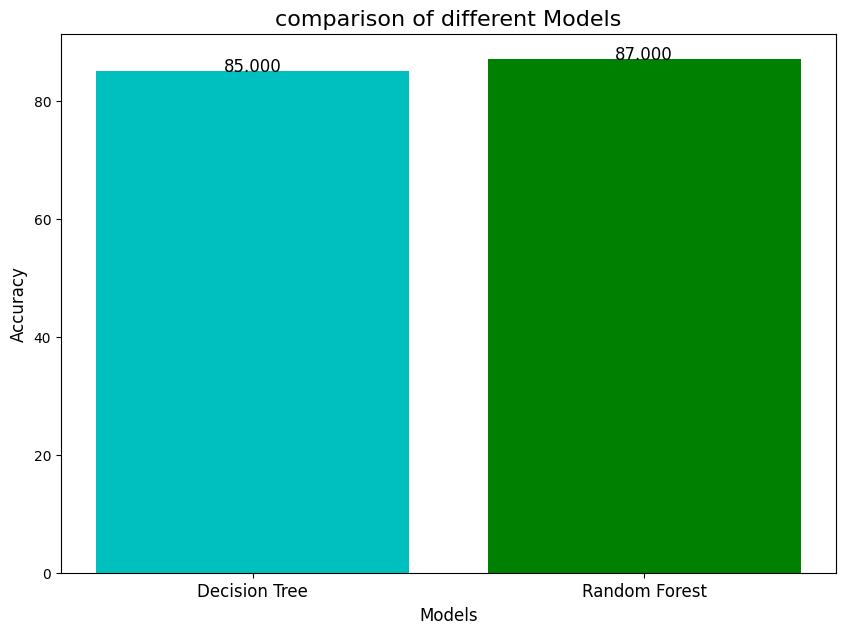

In [88]:
accuracies = {"Decision Tree":85,"Random Forest":87}
# Create a figure with a larger size
plt.figure(figsize=(10, 7))

# Create bars with colors and labels
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['c', 'g', 'r'])
# Add labels and title
plt.title("comparison of different Models", fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)

# Add text labels on top of the bars
for bar, accuracy in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.3f}', ha='center', fontsize=12)

# Set x-axis labels (model names)
plt.xticks(list(accuracies.keys()), fontsize=12)

# Display the plot
plt.show()

In [90]:
from lazypredict.Supervised import LazyClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [02:04<00:00,  4.28s/it]

[LightGBM] [Info] Number of positive: 10952, number of negative: 11041
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1828
[LightGBM] [Info] Number of data points in the train set: 21993, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497977 -> initscore=-0.008094
[LightGBM] [Info] Start training from score -0.008094


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.89,0.89,0.89,0.89,2.15
LGBMClassifier,0.89,0.89,0.89,0.89,0.41
RandomForestClassifier,0.88,0.88,0.88,0.88,3.18
XGBClassifier,0.88,0.88,0.88,0.88,0.43
LabelPropagation,0.87,0.87,0.87,0.87,20.29
BaggingClassifier,0.87,0.87,0.87,0.87,0.85
LabelSpreading,0.87,0.87,0.87,0.87,28.21
AdaBoostClassifier,0.84,0.84,0.84,0.84,0.80
KNeighborsClassifier,0.84,0.84,0.84,0.84,2.82


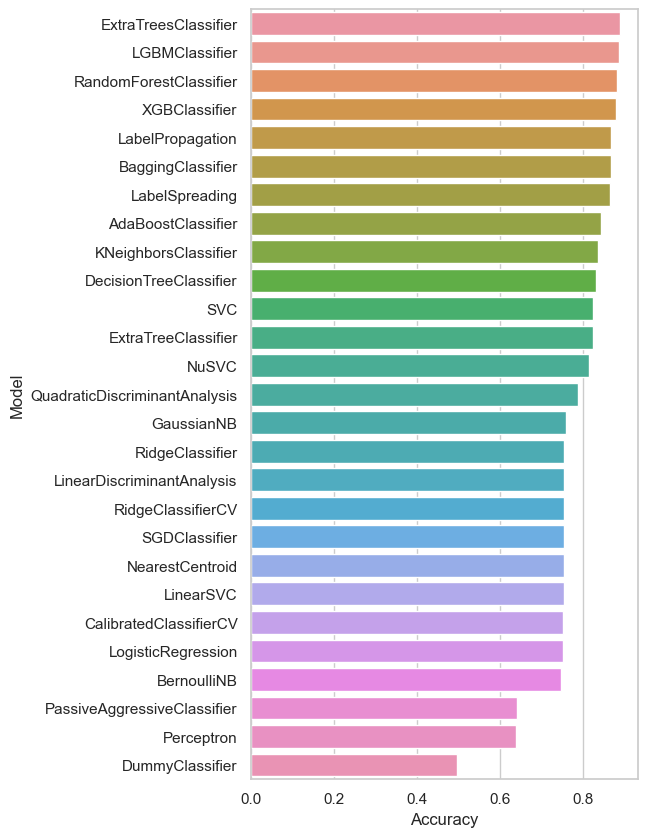

In [92]:

 
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)